# Marketing Analytics Assignment


### About the Data

The company provides home services via online discovery platform 										
Each row corresponds to one transaction (transaction/order/request will be used interchangeably) placed by a customer tracked by "Transaction_ID" unique to the order placed										
"Profile ID" is the unique identity value of each customer. For example, transactions with IDs "BBCHH", "CHWFD" are placed by the same customer identified through profile ID "1"										
Date of Booking is the date on which customer placed the order										
Date of service requested is the date on which the customer needs the service delivered at his/her house						Slot of Booking is the hour of the service requested date when the customer wants the service to be delivered					Source is the channel of channel of customer (eg: Customer came to the app/web via Google, Facebook etc)

#### First, we import the necessary Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
import seaborn as sb

In [2]:
df = pd.read_excel('UrbanClap_data.xlsx')
df.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day)
0,BBCHH,1,2018-05-20,2018-05-21,D,14
1,CHWFD,1,2018-09-23,2018-09-23,C,8
2,DYDMF,2,2018-11-10,2018-11-13,C,11
3,EZYSA,3,2018-04-12,2018-04-16,B,8
4,HWAKX,3,2018-08-05,2018-08-06,B,11


In [3]:
df.tail()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day)
30935,FOXPU,16707,2018-09-29,2018-10-02,C,18
30936,ZNKAO,16708,2018-03-12,2018-03-16,A,13
30937,INBOS,16709,2018-01-05,2018-01-10,C,14
30938,CUNOS,16710,2018-02-26,2018-03-03,C,19
30939,DUBEV,16711,2018-04-30,2018-05-03,B,13


## Q1. 1.Plot new users acquired every month on a bar chart (New user in a month = a customer who has placed a request for the first time ever)

Just by looking at the records of the data frame we can figure out that the data is presently sorted by ```Profile ID```. However, for this question it would be convenient for us if it were sorted by ```Date_of_Booking```

In [4]:
df_sorted = df.sort_values("Date_of_Booking",axis=0, ascending= True)
df_sorted.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day)
25310,SAGTE,13602,2017-12-01,2017-12-03,D,18
14754,SRHLB,7974,2017-12-01,2017-12-03,A,8
10039,RJHNB,5436,2017-12-01,2017-12-06,C,7
3398,VGEHF,1833,2017-12-01,2017-12-02,B,14
22773,CHFWJ,12184,2017-12-01,2017-12-03,C,13


#### Next, we convert the ```Date_of_Booking``` column from YYYY-MM-DD to YYYY-MM format

In [5]:
df_sorted['Month_of_Booking'] = pd.to_datetime(df['Date_of_Booking']).dt.to_period('M')

In [6]:
df_sorted["Month_of_Booking"].unique()

array([Period('2017-12', 'M'), Period('2018-01', 'M'),
       Period('2018-02', 'M'), Period('2018-03', 'M'),
       Period('2018-04', 'M'), Period('2018-05', 'M'),
       Period('2018-06', 'M'), Period('2018-07', 'M'),
       Period('2018-08', 'M'), Period('2018-09', 'M'),
       Period('2018-10', 'M'), Period('2018-11', 'M')], dtype=object)

#### Finally, we plot the new users by carrying out the following operations :
<br>

<div style="text-align: justify">
       1. Keeping only the first instance of a Profile (Since we have already sorted by ```Date_of_Booking``` the first Instance of a ```Profile ID``` is  the customer's first order.    
     2. Grouping the Data by ```Month_of_Booking``` which represents the month of Booking
     
<br>
     3. Using aggregate function count to count the number of orders by month
     
<br>
     
     4. Plotting the data into a bar plot
     
 </div>

Month_of_Booking
2017-12    2424
2018-01    1892
2018-02    1549
2018-03    1490
2018-04    1346
2018-05    1264
2018-06    1273
2018-07    1208
2018-08    1120
2018-09    1020
2018-10    1110
2018-11    1015
Freq: M, Name: Profile ID, dtype: int64


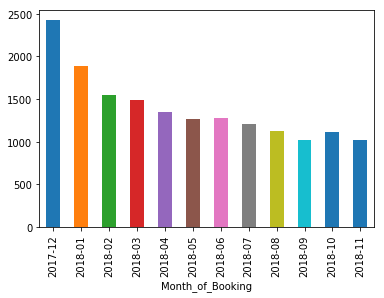

In [7]:
print(df_sorted.drop_duplicates('Profile ID',keep = 'first').groupby("Month_of_Booking").agg("count")["Profile ID"])
(df_sorted.drop_duplicates('Profile ID',keep = 'first').groupby("Month_of_Booking").agg("count")["Profile ID"]).plot.bar()

The above analysis is based on the assumption that there exist no previous order records of any of the Customers prior to the start of the provided dataset i.e. ```2017-12-01```

### Insight from the above 

There has been a gradual decrease in the number of new Customers being acquired month-by-month, however there hasn't been significant decrease in the past 4 months and it might be safe to say that the decreasing trend has stabalized around 1000-1100 new customers per month

## Q2 30-Day repeat rate is defined as percentage of new users who have placed a 2nd order within 30 days of placing their first order. What is the 30-day repeat rate of users acquired in December 2017?"		

The approach I used for this question is that  if I get the first time users for December 2017 like I did for the whole dataset in the last question and check for repeat orders for the next 30 days for each unique customer, I will be able to calculate the percentage of repeat orders.

#### Retrieving First Time Customer Data for December 2017

In [8]:
df_unique = df_sorted.drop_duplicates('Profile ID',keep = 'first')
df_unique_dec = df_unique[df_unique["Date_of_Booking"] < '2018-01-01']

#### Next we follow the following step :
FOR ALL ROWS OF DEC 2017 DATA :<br>
&emsp; &emsp; 1. Get the dates for the next 30 days<br>
&emsp; &emsp; 2. Get the respective data of the next 30 days into a dataframe.<br>
&emsp; &emsp; 3. Check for Repeats<br>
&emsp; &emsp;&emsp; &emsp; 3.1 IF Repeats exist : increment the Count of Repeats

In [9]:
cor = 0 #count of repeats - The number of first time customers repeating orders

for index,row in df_unique_dec.iterrows():
    # Getting the dates for the next 30 days
    dates = np.array(row['Date_of_Booking'], dtype=np.datetime64) + np.arange(30)
    
    # slicing the dataframe and retrieving only data for the next 30 days
    df_dates = df_sorted[df_sorted['Date_of_Booking'].isin(dates)]

    #calculating the number of Repeat orders by this Customer
    df_dates = df_dates.where(df_dates["Profile ID"] == row['Profile ID'])
    df_dates = df_dates.dropna()
    if len(df_dates) > 1 :
        cor = cor + 1

#### Now that we have the number of first time customers repeating orders in 30 days of their first order for the month of Dec 2017 , we can calculate the percentage of the same 

In [10]:
percentage_repeat_for_dec = (cor/len(df_unique_dec))
print('{:.2%}'.format(percentage_repeat_for_dec)," of first time customers in Dec 2017 placed an order within 30 days of their first order")

16.63%  of first time customers in Dec 2017 placed an order within 30 days of their first order


### Answer : 16.63%  of first time customers in Dec 2017 placed an order within 30 days of their first order 

## Q3.What is the 90-day repeat rate of users acquired in Jan,Feb,March 2018?

Approach same as the previous question

In [11]:
df_unique = df_sorted.drop_duplicates('Profile ID',keep = 'first')

#retrieving data for Jan to March 2018
df_unique_jan_to_march = df_unique[df_unique["Date_of_Booking"] < '2018-04-01']
df_unique_jan_to_march = df_unique[df_unique["Date_of_Booking"] >= '2018-01-01']

cor = 0 #count of repeats


for index,row in df_unique_jan_to_march.iterrows():
    # Getting the dates for the next 90 days
    dates = np.array(row['Date_of_Booking'], dtype=np.datetime64) + np.arange(90)
    
    # slicing the dataframe and retrieving only data for the next 90 days
    df_dates = df_sorted[df_sorted['Date_of_Booking'].isin(dates)]
    
    #calculating the number of Repeat orders by this Customer within the time frame
    df_dates = df_dates.where(df_dates["Profile ID"] == row['Profile ID'])
    df_dates = df_dates.dropna()
    if len(df_dates) > 1 :
        #if repeat order exist, increment COR
        cor = cor + 1

In [12]:
percentage_repeat_for_jan_to_march = (cor/len(df_unique_jan_to_march))
print('{:.2%}'.format(percentage_repeat_for_jan_to_march), "of first time customers in Jan, Feb and March 2018 placed an order within 90 days of their first order")

13.26% of first time customers in Jan, Feb and March 2018 placed an order within 90 days of their first order


### Result : 13.26% of first time customers in Jan, Feb and March 2018 placed an order within 90 days of their first order

## Q5. Plot the distribution of users by frequency of their 90-day repeat (Number of times user repeated within first 90 days)		


#### First, we initialize two columns <br> 1. Gap - Reresents Gap between Date of Booking and Date of Service Requested. <br> 90_day_repeat - contains value 1 or 0 i.e there was another order by the customer within 90 days or not

In [13]:
df_unique = df_sorted.drop_duplicates('Profile ID',keep = 'first')
df_unique['Gap'] = 0
df_unique['90_day_repeat'] = 0

C:\Users\Vansh\Anaconda3\envs\env_dlib\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Vansh\Anaconda3\envs\env_dlib\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
df_unique.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),Month_of_Booking,Gap,90_day_repeat
25310,SAGTE,13602,2017-12-01,2017-12-03,D,18,2017-12,0,0
14754,SRHLB,7974,2017-12-01,2017-12-03,A,8,2017-12,0,0
10039,RJHNB,5436,2017-12-01,2017-12-06,C,7,2017-12,0,0
3398,VGEHF,1833,2017-12-01,2017-12-02,B,14,2017-12,0,0
22773,CHFWJ,12184,2017-12-01,2017-12-03,C,13,2017-12,0,0


### An important factor to consider is that we have data up till 30 Nov 2018. Hence, we can only have 90-day-repeat
### data till ```Septermber 1,2018```

In [15]:
df_unique = df_unique[df_unique["Date_of_Booking"] <= '2018-09-01']

In [16]:
# setting transaction id as index for ease in slicing
df_unique = df_unique.set_index("Transaction_ID", drop = False)

cor = 0 #count of repeats

#initializing frequency dictionary
freq = dict.fromkeys(range(1,16),0)

for index,row in df_unique.iterrows():
    
    # Getting the dates for the next 90 days
    dates = np.array(row['Date_of_Booking'], dtype=np.datetime64) + np.arange(90)
    
    # slicing the dataframe and retrieving only data for the next 90 days
    df_dates = df_sorted[df_sorted['Date_of_Booking'].isin(dates)]
    
    #calculating the number of Repeat orders by this Customer within the time frame
    df_dates = df_dates.where(df_dates["Profile ID"] == row['Profile ID'])
    df_dates = df_dates.dropna()
    if len(df_dates) > 1 :
        #if repeat order exist, increment COR
        cor = cor + 1
        
        #update number of customers per freq
        freq[len(df_dates)-1] = freq[len(df_dates)-1] + 1
        
        #update 90_day_repeat column value for this customer 
        df_unique.loc[row['Transaction_ID'],'90_day_repeat'] = 1
    

### Plotting

2520 {1: 1664, 2: 492, 3: 178, 4: 83, 5: 44, 6: 18, 7: 7, 8: 17, 9: 3, 10: 5, 11: 3, 12: 3, 13: 1, 14: 1, 15: 1}


([<matplotlib.axis.XTick at 0x2627233c9e8>,
 <a list of 15 Text xticklabel objects>)

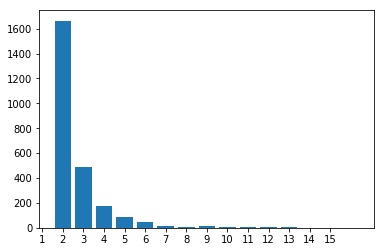

In [17]:
print(cor,freq)
plt.bar(freq.keys(),freq.values())
plt.xticks(range(len(freq)), list(freq.keys()))

([<matplotlib.axis.XTick at 0x26271711748>,
 <a list of 15 Text xticklabel objects>)

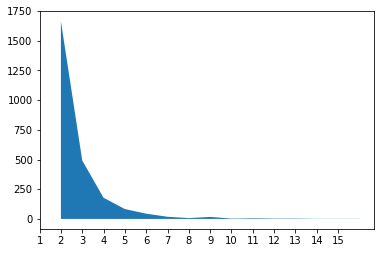

In [18]:
plt.fill_between(freq.keys(), freq.values())
plt.xticks(range(len(freq)), list(freq.keys()))

## Insight from above

#### A total of 2520 customers placed an order within 90 days of their first order, Majority of whom had a frequency of 1,2& 3 i.e 2334 out of 2520 which accounts for 92.6% of the total customers placing an order within 90 days of their first order.

## Q4. Use logistic regression to predict the 90-day repeat of users acquired in November 2018. Hint: Use Source, Slot of Booking, Gap between date of Booking and date of service requested as predictor variables"

First, We import certain libraries which will be useful for creating the model


In [19]:
import seaborn as sb
import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [20]:
%matplotlib inline

#### Slicing data required for the model

Columns such as ``` Transaction_ID, Profile_ID``` cannot be instrumental in predicting future 90_day_repeats as they represent past transactions and already existing users.

In [21]:
X = df_unique.loc[:,['Date_of_Booking',"Date_of_Service_Requested","Source","Slot of Booking (Hour of the Day)",'Month_of_Booking',"Gap","90_day_repeat"]]

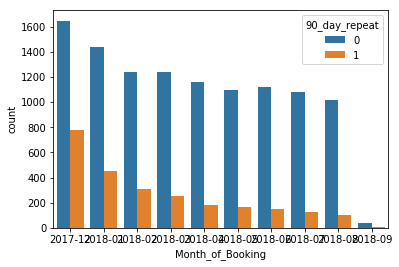

In [22]:
sb.countplot(x='Month_of_Booking',hue='90_day_repeat', data = X)

### An important factor to consider is that we have data up till 30 Nov 2018. Hence, we can only have 90-day-repeat
### data till ```Septermber 1,2018```

In [23]:
X = X[X['Date_of_Booking']<'2018-09-01']

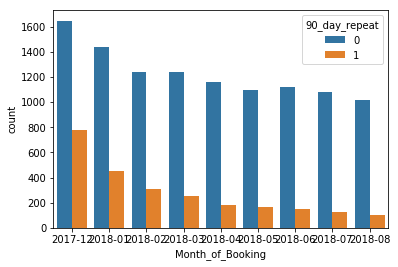

In [24]:
sb.countplot(x='Month_of_Booking',hue='90_day_repeat', data = X)

#### Assigning y as the dependent variable

In [25]:
y =X['90_day_repeat']
y.value_counts()

0    11050
1     2516
Name: 90_day_repeat, dtype: int64

In [26]:
X['90_day_repeat'].value_counts()

0    11050
1     2516
Name: 90_day_repeat, dtype: int64

#### As the above data is imbalanced, some balancing of data will be required for implementing a model, but first we check for the effect of each present column on the column to be predicted 

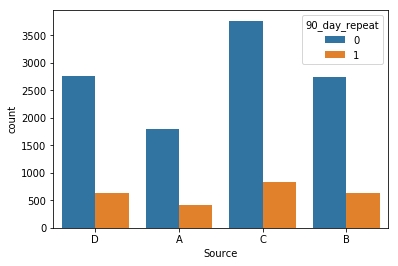

In [27]:
sb.countplot(x='Source',hue=y,data = X)

#### Source seems to have significant effect on 90_day_repeats

In [28]:
import datetime as dt
X['Date_of_Booking'] = X['Date_of_Booking'].map(dt.datetime.toordinal)
X['Date_of_Service_Requested'] =X['Date_of_Service_Requested'].map(dt.datetime.toordinal)


In [29]:
X['Gap'] = X['Date_of_Service_Requested'] - X['Date_of_Booking']

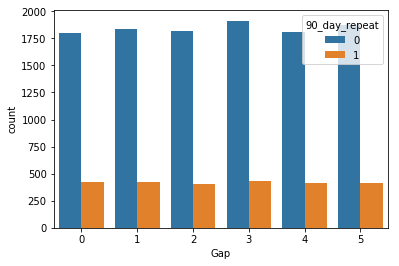

In [30]:
sb.countplot(x='Gap',hue=y,data = X)

#### The Gap between service requested nad service delivery does't seem to have any effect on the 90_day_repeat

In [31]:
X = X.drop(columns = ['Date_of_Booking','Date_of_Service_Requested','Gap']) # So , we can get rid of it

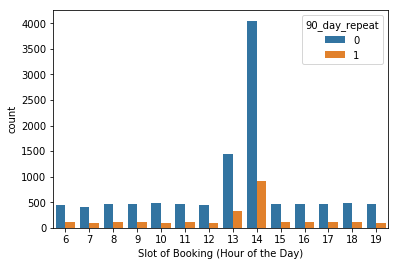

In [32]:
sb.countplot(x='Slot of Booking (Hour of the Day)',hue=y,data = X)

#### The slot of the day seems to have some effect on the 90 day repeats

#### SO, next we are going to group slots for ease of analysis
##### Slots 6-9 as 8
##### Slots 10-12 as 11
##### Slots 13-15 as 14
##### Slots >15 as 17

In [33]:
X['Slot of Booking (Hour of the Day)'] = X['Slot of Booking (Hour of the Day)'].apply(lambda x: 8 if x<=9 else x)
X['Slot of Booking (Hour of the Day)'] = X['Slot of Booking (Hour of the Day)'].apply(lambda x: 11 if (x<13 and x>9) else x)
X['Slot of Booking (Hour of the Day)'] = X['Slot of Booking (Hour of the Day)'].apply(lambda x: 14 if x>12 and x<16 else x)
X['Slot of Booking (Hour of the Day)'] = X['Slot of Booking (Hour of the Day)'].apply(lambda x: 17 if x>15 else x)

In [34]:
X['Slot of Booking (Hour of the Day)'].value_counts()

14    7301
17    2333
8     2227
11    1705
Name: Slot of Booking (Hour of the Day), dtype: int64

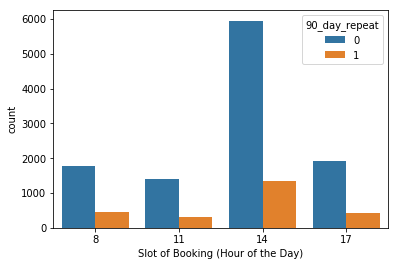

In [35]:
sb.countplot(x='Slot of Booking (Hour of the Day)',hue=y,data = X)

In [36]:
X = X.drop(columns=['90_day_repeat','Month_of_Booking']) #90_day_repeat is the dependent variable and Month isn't required

In [37]:
X.head()

,Source,Slot of Booking (Hour of the Day)
Transaction_ID,,
SAGTE,D,17
SRHLB,A,8
RJHNB,C,8
VGEHF,B,14
CHFWJ,C,14


#### We are required to convert Source to numeric format for ease in Logistic Regression model generation

In [38]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
X['Source'] = number.fit_transform(X['Source'].astype('str'))

#number.fit_transform(x_test['Source'].astype('str')) #GET DUMMIES

In [39]:
X['Source'].value_counts()

2    4595
3    3398
1    3367
0    2206
Name: Source, dtype: int64

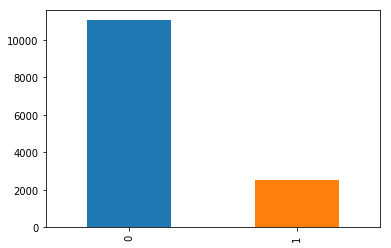

In [40]:
(y.value_counts()).plot.bar()

## As mentioned earlier, due to the imbalance in data we will be required to balance the data out

In [62]:
logisticRegr = LogisticRegression(class_weight = 'balanced') # Generating a logistic regression model
logisticRegr.fit(X,y)

C:\Users\Vansh\Anaconda3\envs\env_dlib\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

#### Side Note :  Also tried balancing out data using SMOTE, it produced the same results

## Preparing the Nov 2018 data

In [42]:
import datetime as dt
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

df_nov = df_sorted.drop_duplicates('Profile ID',keep = 'first')
df_nov = df_nov[df_nov["Date_of_Booking"] >= '2018-11-01']
df_nov.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),Month_of_Booking
19980,CSOCG,10709,2018-11-01,2018-11-02,D,11,2018-11
24338,BPWLE,13034,2018-11-01,2018-11-06,C,14,2018-11
7255,YYFGQ,3860,2018-11-01,2018-11-03,C,13,2018-11
24386,YBNUC,13061,2018-11-01,2018-11-06,B,13,2018-11
10666,FOBFD,5776,2018-11-01,2018-11-01,B,14,2018-11


In [43]:
df_nov['Date_of_Booking'] = df_nov['Date_of_Booking'].map(dt.datetime.toordinal)
df_nov['Date_of_Service_Requested'] =df_nov['Date_of_Service_Requested'].map(dt.datetime.toordinal)
df_nov['Gap'] = df_nov['Date_of_Service_Requested'] - df_nov['Date_of_Booking']
df_nov.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),Month_of_Booking,Gap
19980,CSOCG,10709,736999,737000,D,11,2018-11,1
24338,BPWLE,13034,736999,737004,C,14,2018-11,5
7255,YYFGQ,3860,736999,737001,C,13,2018-11,2
24386,YBNUC,13061,736999,737004,B,13,2018-11,5
10666,FOBFD,5776,736999,736999,B,14,2018-11,0


In [44]:
df_nov = df_nov.loc[:,['Source','Slot of Booking (Hour of the Day)']]

In [45]:
df_nov['Slot of Booking (Hour of the Day)'] = df_nov['Slot of Booking (Hour of the Day)'].apply(lambda x: 8 if x<=9 else x)
df_nov['Slot of Booking (Hour of the Day)'] = df_nov['Slot of Booking (Hour of the Day)'].apply(lambda x: 11 if (x<13 and x>9) else x)
df_nov['Slot of Booking (Hour of the Day)'] = df_nov['Slot of Booking (Hour of the Day)'].apply(lambda x: 14 if x>12 and x<16 else x)
df_nov['Slot of Booking (Hour of the Day)'] = df_nov['Slot of Booking (Hour of the Day)'].apply(lambda x: 17 if x>15 else x)

In [46]:
df_nov['Source'] = number.fit_transform(df_nov['Source'].astype('str'))
df_nov.head()

,Source,Slot of Booking (Hour of the Day)
19980,3,11
24338,2,14
7255,2,14
24386,1,14
10666,1,14


In [47]:
print(logisticRegr.predict(df_nov))
a = logisticRegr.predict(df_nov)
unique_elements, counts_elements = np.unique(a, return_counts=True)
print(unique_elements)

[0 0 0 ... 0 0 0]
[0]


In [1817]:
predictions_nov = dict(zip(unique_elements, counts_elements))

In [1818]:
predictions_nov

{0: 732, 1: 283}

([<matplotlib.axis.XTick at 0x22f13ee96a0>,
 <a list of 2 Text xticklabel objects>)

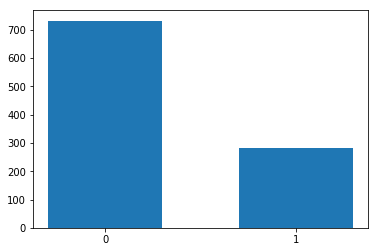

In [1819]:
plt.bar(predictions_nov.keys(),predictions_nov.values(), width=0.6)
plt.xticks(np.arange(2))

### Result : 283 first time customers ordering within 90 days of first order predicted for Nov 2018

In [79]:
import datetime
df1 = df_sorted
df1['Day_of_week'] = df1['Date_of_Service_Requested'].apply(lambda x: x.strftime('%A'))

In [80]:
df1['Day_of_week'].unique()

array(['Sunday', 'Wednesday', 'Saturday', 'Friday', 'Tuesday', 'Monday',
       'Thursday'], dtype=object)

In [81]:
df1['Day_of_week'].value_counts()

Saturday     4575
Sunday       4548
Thursday     4430
Wednesday    4383
Friday       4382
Tuesday      4354
Monday       4268
Name: Day_of_week, dtype: int64

In [82]:
len(df1[df1['Day_of_week']=='Saturday'])/len(df1[df1['Day_of_week']=='Monday'])

1.0719306466729148

## Number of Services Requested for Saturday are on average 7% more than for Mondays

In [83]:
df1['Slot of Booking (Hour of the Day)'] = df1['Slot of Booking (Hour of the Day)'].apply(lambda x: 8 if x<9 else x)
df1['Slot of Booking (Hour of the Day)'] = df1['Slot of Booking (Hour of the Day)'].apply(lambda x: 11 if (x<13 and x>=9) else x)
df1['Slot of Booking (Hour of the Day)'] = df1['Slot of Booking (Hour of the Day)'].apply(lambda x: 14 if x>12 and x<=16 else x)
df1['Slot of Booking (Hour of the Day)'] = df1['Slot of Booking (Hour of the Day)'].apply(lambda x: 17 if x>=17 else x)

In [84]:
df1['Slot of Booking (Hour of the Day)'].value_counts()

14    16758
17     5213
8      5101
11     3868
Name: Slot of Booking (Hour of the Day), dtype: int64

In [85]:
A = df1['Slot of Booking (Hour of the Day)'][~df1['Day_of_week'].isin(['Saturday','Sunday']) ]

In [86]:
B = A[A.isin([8,17])]

In [105]:
(A.count()-B.count())/A.count()

0.20223610654390003

## 66% of services requested during the weekdays were during working hours i.e between 9am - 4pm

In [88]:
(A.count()-B.count())/len(df1)

0.46990950226244343

## 47% of all bookings are for working hours during the weekdays

In [90]:
A = df1['Slot of Booking (Hour of the Day)'][df1['Day_of_week'].isin(['Saturday','Sunday']) ]
A.count()/len(df1)

0.2948610213316096

In [98]:
(A.count()/len(df1)) - (2/7)

0.009146735617323876

In [103]:
len(df1[df1['Slot of Booking (Hour of the Day)']==14])/len(df1) * 100

54.16289592760181

## 54% of all bookings are between 1pm and 4pm